# **Final Task Prediksi Data Peminjaman**

## **Pembacaan dan Review Data`**

#### **Melihat Data**

##### **Membaca dan mengambil file yang ada di dalam google drive yang dipakai**

Melakukan penyambungan penyimpanan google drive dan google collab untuk pengambilan data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/rakamin

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/rakamin


Menampilkan isi yang ada di dalam penyimpanan google drive yang dipakai

In [ ]:
ls

 catboost_info/                       'Final Task Learning XGBoost.ipynb'
'Final Task Learning ANN.ipynb'       'GagalFinal Task Learning ANN.ipynb'
'Final Task Learning CatBoost.ipynb'   loan_data_2007_2014.csv
'Final Task Learning SVM.ipynb'        rakamin.ipynb


##### **Menampilkan 5 Data Teratas**

In [ ]:
import pandas as pd
dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/rakamin/loan_data_2007_2014.csv')
dt.head()

<ipython-input-3-1c9bfc356bab>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/rakamin/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Mendapatkan Informasi dan Membuat Kolom Baru**

##### **Melihat Informasi Data Secara Keseluruhan**

Menampilkan statistik deskriptif

In [ ]:
dt.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


Menampilkan informasi objek

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Melakukan deteksi validasi nilai pada objek

In [ ]:
dt.notnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
466281,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
466282,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False
466283,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,True,False,False,False


Melakukan pengecekan jumlah nilai yang hilang pada objek

In [ ]:
nulls = dt.isnull().sum().to_frame()
for index, row in nulls.iterrows():
  print(index, row[0])

Unnamed: 0 0
id 0
member_id 0
loan_amnt 0
funded_amnt 0
funded_amnt_inv 0
term 0
int_rate 0
installment 0
grade 0
sub_grade 0
emp_title 27588
emp_length 21008
home_ownership 0
annual_inc 4
verification_status 0
issue_d 0
loan_status 0
pymnt_plan 0
url 0
desc 340302
purpose 0
title 20
zip_code 0
addr_state 0
dti 0
delinq_2yrs 29
earliest_cr_line 29
inq_last_6mths 29
mths_since_last_delinq 250351
mths_since_last_record 403647
open_acc 29
pub_rec 29
revol_bal 0
revol_util 340
total_acc 29
initial_list_status 0
out_prncp 0
out_prncp_inv 0
total_pymnt 0
total_pymnt_inv 0
total_rec_prncp 0
total_rec_int 0
total_rec_late_fee 0
recoveries 0
collection_recovery_fee 0
last_pymnt_d 376
last_pymnt_amnt 0
next_pymnt_d 227214
last_credit_pull_d 42
collections_12_mths_ex_med 145
mths_since_last_major_derog 367311
policy_code 0
application_type 0
annual_inc_joint 466285
dti_joint 466285
verification_status_joint 466285
acc_now_delinq 29
tot_coll_amt 70276
tot_cur_bal 70276
open_acc_6m 466285
open_il_6

Menampilkan tipe data dari setiap kolom

In [ ]:
typess = dt.dtypes.to_frame()
for index, row in typess.iterrows():
  print(index, row[0])

Unnamed: 0 int64
id int64
member_id int64
loan_amnt int64
funded_amnt int64
funded_amnt_inv float64
term object
int_rate float64
installment float64
grade object
sub_grade object
emp_title object
emp_length object
home_ownership object
annual_inc float64
verification_status object
issue_d object
loan_status object
pymnt_plan object
url object
desc object
purpose object
title object
zip_code object
addr_state object
dti float64
delinq_2yrs float64
earliest_cr_line object
inq_last_6mths float64
mths_since_last_delinq float64
mths_since_last_record float64
open_acc float64
pub_rec float64
revol_bal int64
revol_util float64
total_acc float64
initial_list_status object
out_prncp float64
out_prncp_inv float64
total_pymnt float64
total_pymnt_inv float64
total_rec_prncp float64
total_rec_int float64
total_rec_late_fee float64
recoveries float64
collection_recovery_fee float64
last_pymnt_d object
last_pymnt_amnt float64
next_pymnt_d object
last_credit_pull_d object
collections_12_mths_ex_med fl

##### **Menambah Kolom Baru Sebagai Kolom Target Prediksi**

Mengecek kolom target

In [ ]:
dt.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Membuat kolom baru *good_bad_loan*

In [ ]:
import numpy as np

good_loans = ['Current', 'Fully Paid', 'In Grace Period',
              'Does not meet the credit policy. Status:Fully Paid']

dt['good_bad_loan'] = np.where(dt['loan_status'].isin(good_loans), 1, 0)

## **Data Preprocessing`**

#### **Melakukan Feature Selection**

##### Melakukan Penghilangan Kolom Berdasarkan Identifikasi yang Dilakukan

Melakukan penghilangan kolom berdasarkan penilaian pribadi terkait kegunaan kolom tersebut pada model

In [ ]:
dt.drop(columns=['Unnamed: 0','id','member_id','url','title','desc','zip_code','emp_title','issue_d', 'loan_status',
                 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d','sub_grade','funded_amnt','funded_amnt_inv'], inplace=True)

##### Melakukan Penilaian kembali berdasarkan data

Pengecekan kolom yang memiliki data kosong diatas 50%

In [ ]:
cek_kolom = dt.isna().mean()
cek_kolom[cek_kolom > 0.5]

mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

Pengecekan kolom yang memiliki nilai unik kurang dari 2 atau nilai uniknya sama dengan panjang data frame

In [ ]:
dt.nunique()[(dt.nunique()<2) | (dt.nunique() == len(dt))]

policy_code                  1
application_type             1
annual_inc_joint             0
dti_joint                    0
verification_status_joint    0
open_acc_6m                  0
open_il_6m                   0
open_il_12m                  0
open_il_24m                  0
mths_since_rcnt_il           0
total_bal_il                 0
il_util                      0
open_rv_12m                  0
open_rv_24m                  0
max_bal_bc                   0
all_util                     0
inq_fi                       0
total_cu_tl                  0
inq_last_12m                 0
dtype: int64

##### Melakukan penghilangan kolom berdasarkan penilaian data kosong diatas 50% dan nilai unik kurang dari 2

In [ ]:
hapus_kolom1 = list(dt.nunique()[(dt.nunique()<2) | (dt.nunique() == len(dt))].index)
hapus_kolom2 = list(cek_kolom[cek_kolom > 0.5].index)
kolom12= set(hapus_kolom1+hapus_kolom2)

dt.drop(kolom12, axis=1, inplace=True)
dt.shape


(466285, 27)

Menampilkan Heatmap

<ipython-input-15-81b7e8fd9328>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), annot=True, annot_kws={'size':14})


<Axes: >

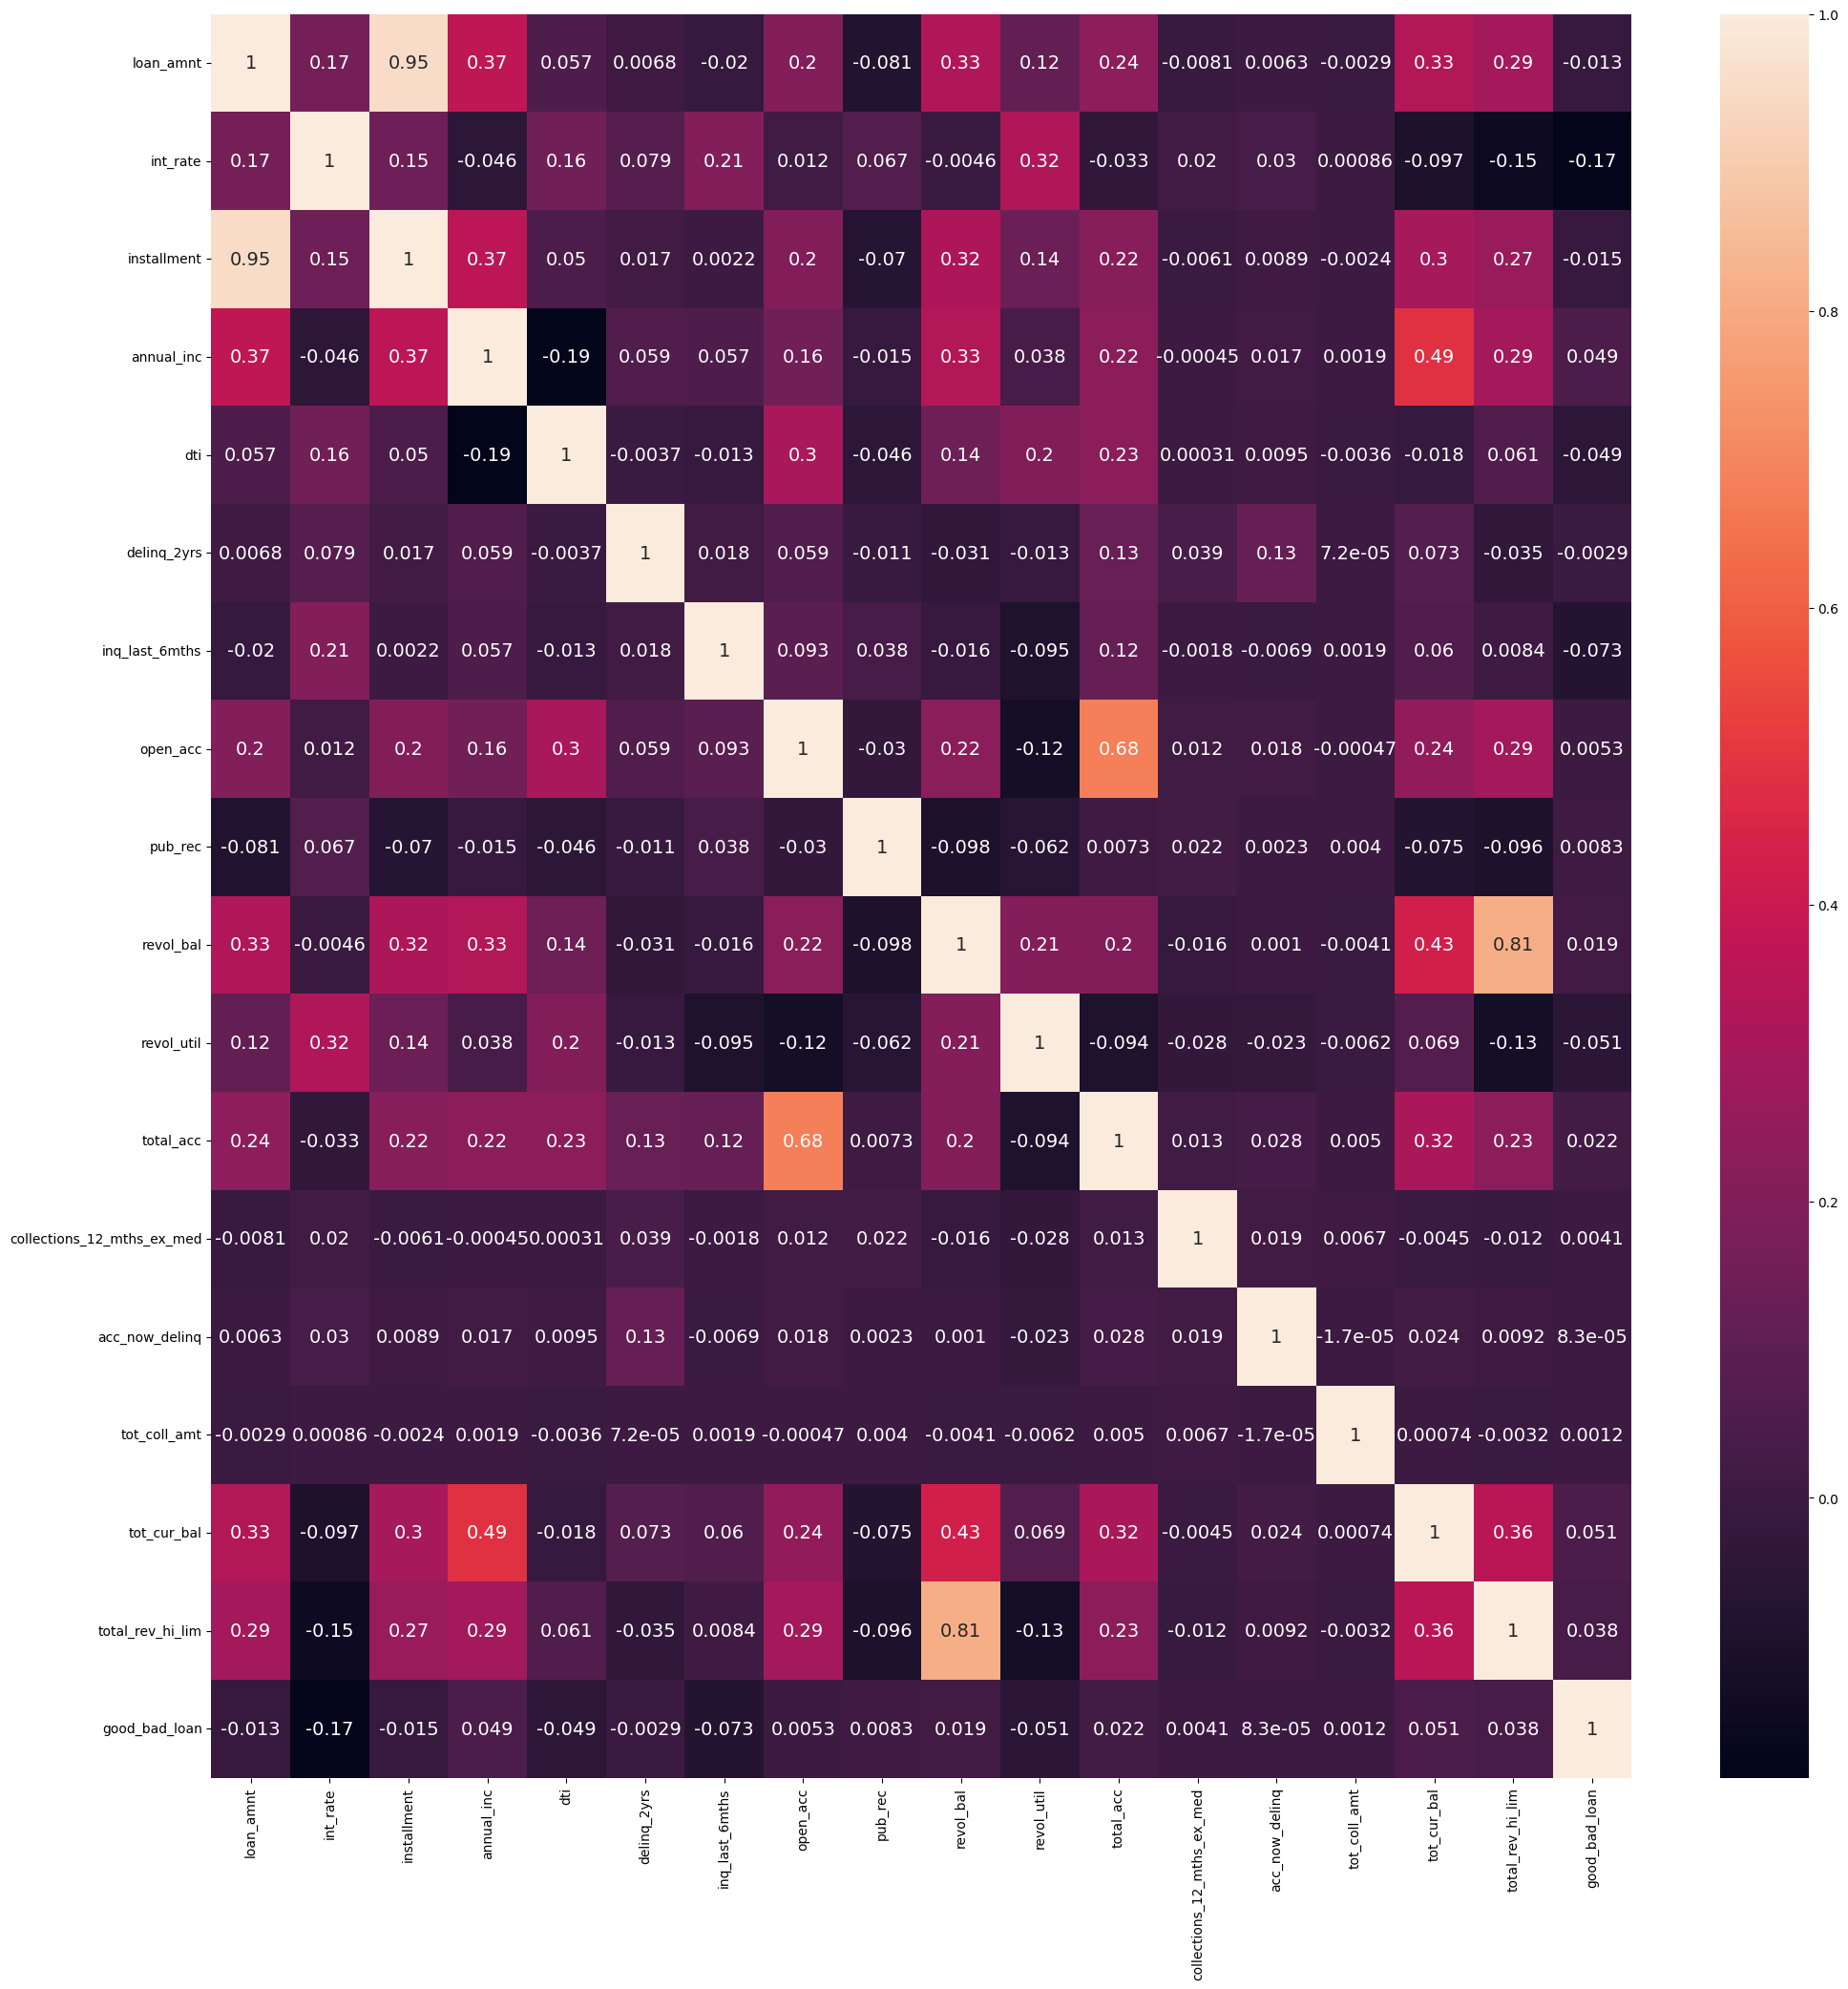

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check correlation
plt.figure(figsize=(24,24))
sns.heatmap(dt.corr(), annot=True, annot_kws={'size':14})

#### **Melakukan Handling Missing Data**

##### Melakukan Pengecekan Missing Value

Melakukan perhitungan total dari data yang kosong

In [ ]:
dt.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim              70276
good_bad_loan                     0
dtype: int64

Mengambil kolom yang memiliki nilai null

In [ ]:
dt_columns=dt.columns[dt.isnull().any()].tolist()
dt[dt_columns].isnull().sum()*100/len(dt)

emp_length                     4.505399
annual_inc                     0.000858
delinq_2yrs                    0.006219
earliest_cr_line               0.006219
inq_last_6mths                 0.006219
open_acc                       0.006219
pub_rec                        0.006219
revol_util                     0.072917
total_acc                      0.006219
collections_12_mths_ex_med     0.031097
acc_now_delinq                 0.006219
tot_coll_amt                  15.071469
tot_cur_bal                   15.071469
total_rev_hi_lim              15.071469
dtype: float64

##### Melakukan Drop Kolom yang Memiliki Banyak Missing Value

Terdapat 3 kolom yang terdapat missing value sebanyak 15% dari data

In [ ]:
dt.dropna(subset = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim','revol_util'], inplace = True)

Reset Index

In [ ]:
dt.reset_index(drop= True, inplace = True)

#### **Melakukan Transformasi Tipe Data Variabel Kontinu**

Terdapat 4 variabel yang akan diubah

In [ ]:
kontinu_cols = ['term', 'emp_length', 'earliest_cr_line']
dt[kontinu_cols]

,term,emp_length,earliest_cr_line
0,36 months,10+ years,Oct-86
1,36 months,1 year,Jan-07
2,36 months,10+ years,Mar-94
3,36 months,10+ years,Oct-98
4,36 months,2 years,Mar-98
...,...,...,...
395785,60 months,4 years,Apr-03
395786,60 months,10+ years,Jun-97
395787,60 months,7 years,Dec-01
395788,36 months,3 years,Feb-03


##### Transformasi varabel term

In [ ]:
dt['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          36 months
             ...    
395785     60 months
395786     60 months
395787     60 months
395788     36 months
395789     36 months
Name: term, Length: 395790, dtype: object

Konversi tipe data menjadi numerik

In [ ]:
dt['term'] = pd.to_numeric(dt['term'].str.replace(' months', ''))
dt['term']

0         36
1         36
2         36
3         36
4         36
          ..
395785    60
395786    60
395787    60
395788    36
395789    36
Name: term, Length: 395790, dtype: int64

##### Transformasi variabel emp_length

Menampilkan nilai unik

In [ ]:
dt['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

Konversi tipe data menjadi numerik

In [ ]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

dt['emp_length'] = dt['emp_length'].map(emp_map).fillna('0').astype(int)
dt['emp_length'].unique()

array([10,  1,  2,  4,  3,  7,  5,  6,  9,  8,  0])

##### Transformasi variabel earliest_cr_line

In [ ]:
dt['earliest_cr_line']

0         Oct-86
1         Jan-07
2         Mar-94
3         Oct-98
4         Mar-98
           ...  
395785    Apr-03
395786    Jun-97
395787    Dec-01
395788    Feb-03
395789    Feb-00
Name: earliest_cr_line, Length: 395790, dtype: object

Transformasi Menjadi Objek

In [ ]:
dt['earliest_cr_line'] = pd.to_datetime(dt['earliest_cr_line'], format = '%b-%y')
dt['earliest_cr_line'] = (dt['earliest_cr_line']  - dt['earliest_cr_line'] .min())  / np.timedelta64(1,'D')
dt['earliest_cr_line']

0          6482.0
1         13879.0
2          9190.0
3         10865.0
4         10651.0
           ...   
395785    12508.0
395786    10378.0
395787    12022.0
395788    12449.0
395789    11353.0
Name: earliest_cr_line, Length: 395790, dtype: float64

In [ ]:
dt.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
good_bad_loan                 0
dtype: int64

#### **Melakukan Pengecekan Fitur Tipe Data**

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395790 entries, 0 to 395789
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   395790 non-null  int64  
 1   term                        395790 non-null  int64  
 2   int_rate                    395790 non-null  float64
 3   installment                 395790 non-null  float64
 4   grade                       395790 non-null  object 
 5   emp_length                  395790 non-null  int64  
 6   home_ownership              395790 non-null  object 
 7   annual_inc                  395790 non-null  float64
 8   verification_status         395790 non-null  object 
 9   purpose                     395790 non-null  object 
 10  addr_state                  395790 non-null  object 
 11  dti                         395790 non-null  float64
 12  delinq_2yrs                 395790 non-null  float64
 13  earliest_cr_li

## **Exploratory Data Analysis`**

In [ ]:
def annot_plot(ax,w,h):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  for p in ax.patches:
      ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

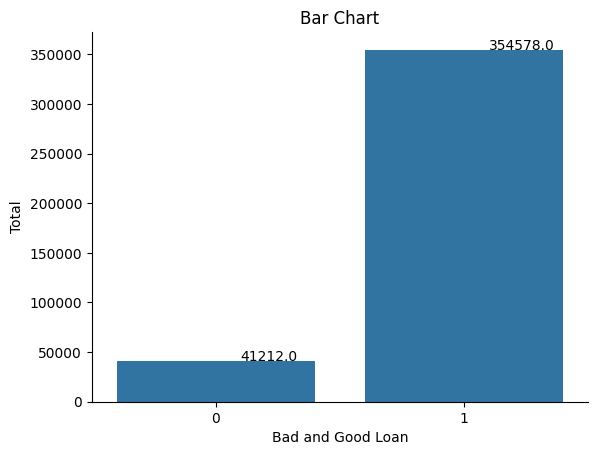

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(dt ,x='good_bad_loan')
annot_plot(ax, 0.5,1)

plt.title("Bar Chart")
plt.xlabel('Bad and Good Loan')
plt.ylabel('Total')

plt.show()

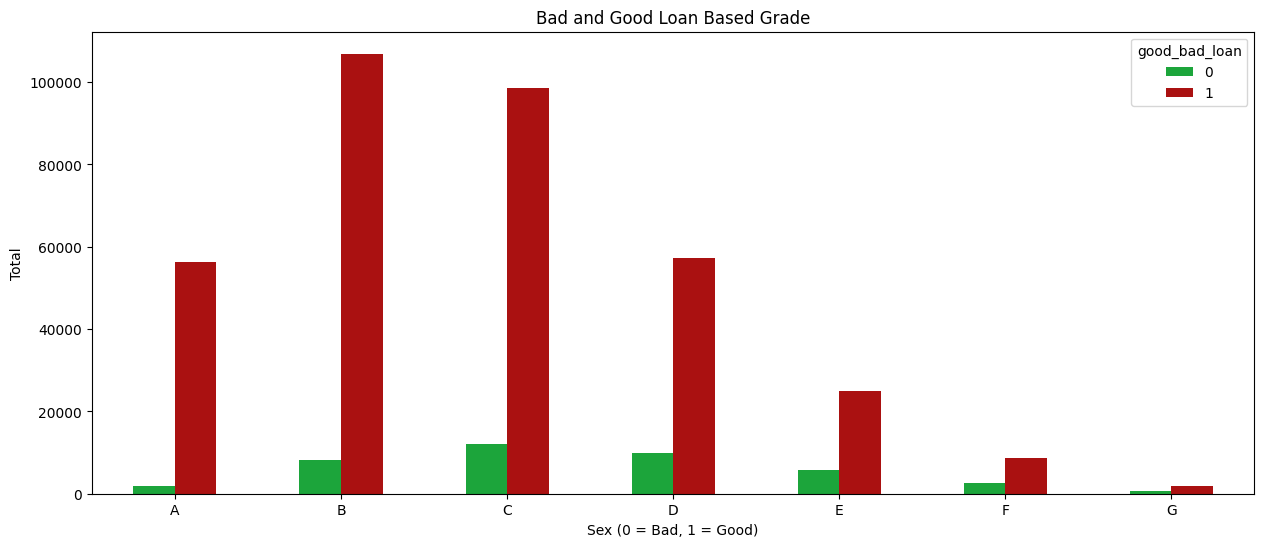

In [ ]:
pd.crosstab(dt.grade,dt['good_bad_loan']).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('Bad and Good Loan Based Grade')
plt.xlabel('Sex (0 = Bad, 1 = Good)')
plt.xticks(rotation=0)
plt.ylabel('Total')
plt.show()

In [ ]:
numeric_features = list(dt.select_dtypes(["float64" , "int64",'int32']).columns)
n = numeric_features.index('good_bad_loan')
del n

cat_cols = list(dt.select_dtypes(["object","datetime64[ns]"]).columns)

target = "good_bad_loan"

print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{cat_cols}\n\ntarget:\n{target}')

numeric_features:
['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'good_bad_loan']

categorical_features:
['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

target:
good_bad_loan


## **Encoding & Normalization`**

### **One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = [col for col in dt.select_dtypes(include='object').columns.tolist()]
onehot_cols = pd.get_dummies(dt[cat_cols], drop_first=True)
onehot_cols

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395785,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
395786,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
395787,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395788,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_cols = [col for col in dt.columns.tolist() if col not in cat_cols + ['good_bad_loan']]
normal = pd.DataFrame(scaler.fit_transform(dt[num_cols]), columns=num_cols)

normal

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.766176,0.0,0.248754,0.621750,1.0,0.006936,0.571893,0.000000,0.177618,0.000,0.156627,0.000000,0.014262,0.068587,0.162338,0.0,0.0,0.000000,0.014354,0.00598
1,0.257353,0.0,0.397807,0.223461,0.1,0.003068,0.628157,0.000000,0.380309,0.000,0.132530,0.000000,0.003101,0.059173,0.168831,0.0,0.0,0.000000,0.001765,0.00150
2,0.323529,0.0,0.030907,0.248924,1.0,0.013605,0.351338,0.000000,0.251822,0.125,0.132530,0.000000,0.005126,0.024207,0.129870,0.0,0.0,0.000000,0.033455,0.00610
3,0.323529,0.0,0.375374,0.277011,1.0,0.004935,0.423606,0.000000,0.297720,0.000,0.072289,0.031746,0.002169,0.077104,0.194805,0.0,0.0,0.001681,0.001701,0.00080
4,0.411765,0.0,0.144566,0.326697,0.2,0.008003,0.412853,0.000000,0.291856,0.000,0.084337,0.000000,0.004450,0.083156,0.175325,0.0,0.0,0.000165,0.034061,0.00153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395785,0.511765,1.0,0.422233,0.295212,0.4,0.014272,0.496374,0.000000,0.342741,0.250,0.204819,0.000000,0.009034,0.086966,0.220779,0.0,0.0,0.000000,0.036874,0.00298
395786,0.617647,1.0,0.696411,0.403280,1.0,0.010004,0.461365,0.000000,0.284376,0.625,0.204819,0.015873,0.007099,0.051888,0.181818,0.0,0.0,0.000000,0.027728,0.00393
395787,0.579412,1.0,0.547856,0.354128,0.7,0.005736,0.641410,0.000000,0.329424,0.250,0.204819,0.000000,0.002603,0.057268,0.266234,0.0,0.0,0.000000,0.009200,0.00130
395788,0.029412,0.0,0.094716,0.028362,0.3,0.010671,0.134784,0.103448,0.341125,0.125,0.240964,0.000000,0.004439,0.024095,0.162338,0.0,0.0,0.000000,0.073951,0.00530


Final Data

In [ ]:
final_data = pd.concat([onehot_cols, normal, dt[['good_bad_loan']]], axis=1)
final_data.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad_loan
0,1,0,0,0,0,0,0,0,0,1,...,0.000000,0.014262,0.068587,0.162338,0.0,0.0,0.000000,0.014354,0.00598,1
1,0,1,0,0,0,0,0,0,0,0,...,0.000000,0.003101,0.059173,0.168831,0.0,0.0,0.000000,0.001765,0.00150,1
2,0,0,0,0,0,0,1,0,0,0,...,0.000000,0.005126,0.024207,0.129870,0.0,0.0,0.000000,0.033455,0.00610,1
3,1,0,0,0,0,0,0,0,0,0,...,0.031746,0.002169,0.077104,0.194805,0.0,0.0,0.001681,0.001701,0.00080,1
4,0,0,0,0,0,0,1,0,0,0,...,0.000000,0.004450,0.083156,0.175325,0.0,0.0,0.000165,0.034061,0.00153,1


## **Modeling**

### **Spliting Data**

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score,f1_score,classification_report

In [ ]:
x = final_data.drop(['good_bad_loan'], axis=1)
y = final_data['good_bad_loan']

In [ ]:
import numpy as np
cat_features = np.where(x.dtypes != float)[0]
print(cat_features)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=14)
y_train.value_counts()

1    283717
0     32915
Name: good_bad_loan, dtype: int64

### **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=14)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)


print('Dataset Sebelum di SMOTE', Counter(y_train))
print('Dataset setelah di SMOTE', Counter(y_smote))

Dataset Sebelum di SMOTE Counter({1: 283717, 0: 32915})
Dataset setelah di SMOTE Counter({1: 283717, 0: 283717})


### **Model Training Data**

In [ ]:
model = CatBoostClassifier(iterations= 500,
    random_seed=42,
    logging_level='Silent')
model.fit(x_smote, y_smote, eval_set=(X_test,y_test),
          use_best_model=True, early_stopping_rounds=10,
          cat_features=cat_features,verbose=1000)

## **Classification Report**

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
#accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#precision
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" % (precision * 100.0))

#recall
recall = recall_score(y_test, y_pred)
print("Recall : ",recall )

#F1 SCORE
f1score = f1_score(y_test.T,y_pred, average='macro')
print("F1 Score : ",f1score )

Accuracy: 89.52%
Precision : 89.52%
Recall :  1.0
F1 Score :  0.47247049563500443


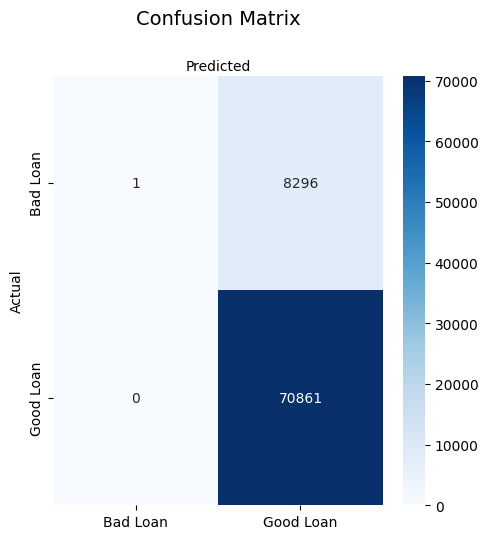

In [ ]:
c_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))

sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="Blues" ,fmt='g',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'],)
ax1.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1,fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
ypred = model.predict(X_test)
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      8297
           1       0.90      1.00      0.94     70861

    accuracy                           0.90     79158
   macro avg       0.95      0.50      0.47     79158
weighted avg       0.91      0.90      0.85     79158



## **Feature Importance**

In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importancess = pd.Series(importances, index=x.columns).sort_values()
feature_importancess

addr_state_MN      0.000000
addr_state_AZ      0.000000
addr_state_DE      0.000000
addr_state_HI      0.000000
addr_state_IN      0.000000
                    ...    
pub_rec            7.358773
delinq_2yrs        9.889694
emp_length        16.437466
inq_last_6mths    28.576298
open_acc          33.286230
Length: 95, dtype: float64

In [ ]:
important_features = feature_importancess[feature_importancess > 0.1]
print(important_features)

tot_coll_amt       0.192796
term               0.547322
int_rate           1.279278
total_acc          1.861111
pub_rec            7.358773
delinq_2yrs        9.889694
emp_length        16.437466
inq_last_6mths    28.576298
open_acc          33.286230
dtype: float64


Text(0.5, 1.0, 'Feature Importance')

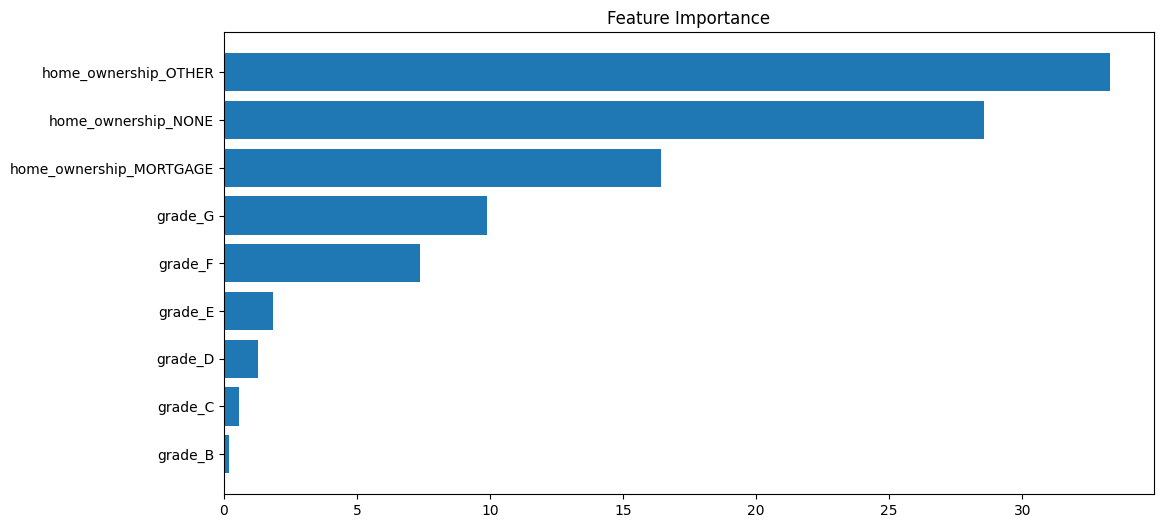

In [ ]:
feature_importances =important_features
sorted_idx = np.argsort(feature_importances)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


## **HyperParameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# defining parameter range
param_grid = {
    'max_depth': stats.randint(9, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.05, 0.5)
}

grid = RandomizedSearchCV(model, param_grid, cv=7, scoring='accuracy')

# fitting the model for grid search
grid.fit(x_smote, y_smote)

RandomizedSearchCV(cv=7,
                   estimator=<catboost.core.CatBoostClassifier object at 0x788b30ae7790>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x788b2f1fda50>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x788b2f33d330>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x788b2f1feb90>},
                   scoring='accuracy')

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
print("Best score: ", grid.best_score_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.10624297800573869, 'max_depth': 9, 'subsample': 0.5092174070919543}
Best score:  0.9396211718014781
